# Abordagem 1

## importando bibliotecas

In [ ]:
#importação das bibliotecas
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.12.0'

In [ ]:
#caso de erro a gente instala uma versão anterior do tensorflow
!pip install tensorflow == 2.6.0

ERROR: Invalid requirement: '=='


## importação e montagem do drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## extração dos pixeis

In [ ]:
path = '/content/drive/MyDrive/estudo de visao computacional/Datasets/homer_bart_1.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
diretorio = '/content/homer_bart_1'
arquivos = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))]
print(arquivos) #aqui nos criamos uma lista com o nome de todos os arquivos da pasta

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

importante: aqui nos vemos que as imagens tem tamanhos diferentes,e é crucial que elas tenham o mesmo tamanho, pois para cada tamanho será necessário um neuronio de entrada diferente

In [ ]:
altura, largura = 128, 128

In [ ]:
imagens = []
classes = []

adquirindo os pixeis da imagem

In [ ]:
for imagem_caminho in arquivos:
  try: #serve para ele ignorar arquivos que não são imagens
    imagem = cv2.imread(imagem_caminho)
    (H, W) = imagem.shape[:2]
  except:
    continue
  imagem = cv2.resize(imagem, (largura, altura))
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
  cv2_imshow(imagem)

  imagem = imagem.ravel() #transforma a imagem que é bidimensional(matriz) em unidimensiomal (numero total de pixeis)
  imagens.append(imagem)
  #agora vamos separar as imagens em nome para classificar como homer ou bart
  nome_imagem = os.path.basename(os.path.normpath(imagem_caminho))
  if nome_imagem.startswith('b'):
    classe = 0
  else:
    classe = 1
  classes.append(classe) #quando a classe for 0 é imagem do bart
  print(classe)


NameError: ignored

In [ ]:
imagens

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 128, 123, 124], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 2

In [ ]:
classes

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


agora para facilitar a manipulação de dados vamos transformar as variaveis imagens e classes que são listas, em arrays do numpy

In [ ]:
X = np.asarray(imagens)
Y = np.asarray(classes)

In [ ]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X.shape #o primeiro numero é a quantidade de imagens e o segundo a quantidade de pixeis em cada imagem

(269, 16384)

In [ ]:
Y.shape #quantidade de imagens

(269,)

In [ ]:
np.unique(Y, return_counts = True) #aqui mostra quantas imagens tem do bart[0] e do homer[1]

(array([0, 1]), array([160, 109]))

## Normalização dos dados

In [ ]:
X[0].max(), X[0].min() #255 é branco e 0 é preto

(255, 0)

a normalização de dados consiste em colocar os pixeis na mesma escala, então vamos colocar o preto como 0 e o branco como 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X[0].max(), X[1].min()

(1.0000000000000002, 0.0)

In [ ]:
X[1]

array([0.9947644 , 0.99479167, 0.99479167, ..., 0.99559471, 0.99595142,
       0.9950495 ])

## Base de treinamento e testes

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(X, Y, test_size=0.2, random_state = 1)
#test_size - quantos porcentos da base vai servir de resultado, o resto vai pra treinamento
#random_state - quantas variações de imagem vamos ter, se escolher 1 vai ser sempre as mesmas imagens para teste e treinamento

In [ ]:
X_treinamento.shape, Y_treinamento.shape

((215, 16384), (215,))

In [ ]:
X_teste.shape, Y_teste.shape

((54, 16384), (54,))

## construção e treinamento da rede neural

In [ ]:
from keras.layers.attention.multi_head_attention import activation
rede1 = ''
rede1 = tf.keras.models.Sequential() #aqui criamos a rede neural
#aqui adicionamos uma camada escondida na rede neural e uma de entrada, a input shape são os neuronios da camada de entrada
rede1.add(tf.keras.layers.Dense(input_shape = (16384,), units = 8193, activation='relu')) #esse activation transforma numeros negativos em 0
#16384 =  qtd de pixeis \ (16384[qtd de pixeis] + 2[classes]) / 2 = 8193 quantidade de neuronios
rede1.add(tf.keras.layers.Dense(units = 8193, activation='relu'))
#acima adicionamos outra camada, mas apenas a oculta
#agora vamos definir a camada de saida
rede1.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #apenas uma saida pois queremos apenas uma classificação, e a activation sigmoid serve para retornar apenas valores 0 e 1

In [ ]:
rede1.summary() #o params é peso que precisamos treinar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#agora vamos compilar a rede
rede1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
#o optimizer é o algoritmo de descida de gradiente
#o loss é a função utilizada para calcular o erro o binary crossentropy serve
#porque so temos 2 saidas e o entropy serve para calculos complexos de deep learning
#metrics serve para avaliação do algoritmo e o accuracy é a taxa de acerto

In [ ]:
historico = rede1.fit(X_treinamento, Y_treinamento, epochs= 50)
#isso é o proprio treinamento do algoritmo
#loss é o valor do erro, quanto menor melhor


Epoch 1/50
2/7 [=======>......................] - ETA: 17s - loss: 307.2170 - accuracy: 0.4531

KeyboardInterrupt: ignored

## Avaliação da Rede neural

In [ ]:
#o historico vira o dicionario com as perdas e a precisão
historico.history.keys()

In [ ]:
plt.plot(historico.history['loss'])
#grafico do historico de perda de acordo com as epocas

In [ ]:
plt.plot(historico.history['accuracy'])
#grafico da taxa de precisão de acordo com as epocas

In [ ]:
X_teste #imagens não usadas

In [ ]:
previsões = rede1.predict(X_teste)
previsões

In [ ]:
previsões = (previsões > 0.5)
previsões
#true homer, false bart

In [ ]:
Y_teste

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_teste, previsões)
#mede a precisão certinha da rede

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_teste, previsões)
cm
#isso mostra quantas ele errou e quantas acertou
#esquerda é o acerto

In [ ]:
sns.heatmap(cm, annot=True)
#os quadrados que tem numeros diferentes, a diagonal subindo, da esquerda para direita são os erros

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_teste, previsões))

## Salvar e carregar rede neural

In [ ]:
model_json = rede1.to_json()
with open('rede1.json', 'w') as json_file:
  json_file.write(model_json)
#esse cria um json com a estrutura da rede

In [ ]:
from keras.models import save_model
rede1_saved = save_model(rede1, 'weights1.hdf5')
#esse cria um arquivo com os pesos da rede, é bom fazer após ficar satisfeito com os resultados

In [ ]:
#como carregar a rede
with open('rede1.json') as json_file:
  json_saved_model = json_file.read()
json_saved_model

In [ ]:
rede1_carregada = tf.keras.models.model_from_json(json_saved_model)
rede1_carregada.load_weights('/content/weights1.hdf5')
rede1_carregada.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
#aqui carregamos a rede neural

In [ ]:
rede1_carregada.summary()

## classificação de uma unica imagem

In [ ]:
X_teste[0], Y_teste[0]
#precisamos dos formatos da imagem como matriz

In [ ]:
cv2_imshow(X_teste[0].reshape(128,128))

In [ ]:
#a imagem está preta pois normalizamos os dados entre 0 e 1, como mostrado no array
#agora precisamos desnormalizar
imagem_teste = X_teste[0]
imagem_teste = scaler.inverse_transform(imagem_teste.reshape(1, -1))

In [ ]:
cv2_imshow(imagem_teste.reshape(128,128))

In [ ]:
imagem_teste = #caminho
imagem_teste / 255
imagem_teste = imagem_teste.reshape(altura,largura)
previsao = rede.predict(imagem_teste)
if previsao[0][0] < 0.5:
  print('é 0')
else:
  print('é 1')

In [ ]:
rede1_carregada.predict(imagem_teste)
#o print vai sair como um array de 2 dimensões, para sair só o valor devemos colocar 2 [] de index

In [ ]:
if rede1_carregada.predict(imagem_teste)[0][0] < 1:
  print('o resultado deu bart')
else:
  print('o resultado deu homer')

# Abordagem 2 extração de caracteristicas

## extração das caracteristicas

In [ ]:
arquivos = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))]
print(arquivos)
#pega todos os caminhos das imagens do homer e do bart

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [ ]:
export = 'boca,calca,sapatos,camisa,calcao,tenis,classe\n'

In [ ]:
mostrar_imagens = False
caracteristicas = []

In [ ]:
count = 0
for imagem_caminho in arquivos:
  try:
    imagem_original = cv2.imread(imagem_caminho)
    (H, W) = imagem_original.shape[:2] #esse 2 indica que vai buscar as 2 primeiras colunas que é a altura e a largura
  except: #porem essas imagens estão grandes e com dimensões variadas
    continue

  #cv2_imshow(imagem_original)
  imagem_alterada = imagem_original.copy()
  imagem_caracteristica = []
  imagem_nome = os.path.basename(os.path.normpath(imagem_caminho)) #aqui vai ser para extrair se é uma imagem do homer ou do bart
  boca = calca = sapato = 0
  camisa = calcao = tennis = 0

  if imagem_nome.startswith('b'):
    classe = 1
  else:
    classe = 0
  for altura in range(0, H):
    for largura in range(0, W):
      #lembrar que o python eh bgr
      azul = imagem_alterada.item(altura,largura, 0)
      verde = imagem_alterada.item(altura,largura, 1)
      vermelho = imagem_alterada.item(altura,largura, 2)
        #homer -> marrom da boca
      if (azul >=95 and azul <=140 and verde >= 160 and verde <=185 and vermelho >= 175 and vermelho <= 200):
        imagem_alterada[altura, largura] = [0, 255, 255]
        boca += 1
      #homer -> azul da calça
      if (azul >=150 and azul <=180 and verde >= 98 and verde <=120 and vermelho >= 0 and vermelho <= 90):
        imagem_alterada[altura, largura] = [0, 255, 255]
        calca += 1
      #homer -> cinza dos sapatos
      if H > (H/2):
        if (azul >=25 and azul <=45 and verde >= 25 and verde <=45 and vermelho >= 25 and vermelho <= 45):
          imagem_alterada[altura, largura] = [0, 255, 255]
          sapato += 1

      #bart -> laranja da camisa
      if (azul >=11 and azul <=50 and verde >= 85 and verde <=105 and vermelho >= 240 and vermelho <= 255):
        imagem_alterada[altura, largura] = [0, 255, 0]
        camisa += 1

      #bart -> azul do calcao
      if (azul >=125 and azul <=170 and verde >= 0 and verde <=12 and vermelho >= 0 and vermelho <= 25):
        imagem_alterada[altura, largura] = [0, 255, 0]
        calcao += 1

      #bart -> azul do tennis
      if H > (H/2):
        if (azul >=125 and azul <=170 and verde >= 0 and verde <=12 and vermelho >= 0 and vermelho <= 25):
          imagem_alterada[altura, largura] = [0, 255, 0]
          tennis += 1
  boca = round((boca /(H*W)) *100,9) #porcentagem da boca do homer
  calca = round((calca /(H*W)) *100,9) #porcentagem da calça do homer
  sapato = round((sapato /(H*W)) *100,9) #porcentagem da boca do homer
  camisa = round((camisa /(H*W)) *100,9) #porcentagem da boca do homer
  calcao = round((calcao /(H*W)) *100,9) #porcentagem da boca do homer
  tennis = round((tennis /(H*W)) *100,9) #porcentagem da boca do homer
  imagem_caracteristica.append(boca)
  imagem_caracteristica.append(calca)
  imagem_caracteristica.append(sapato)
  imagem_caracteristica.append(camisa)
  imagem_caracteristica.append(calcao)
  imagem_caracteristica.append(tennis)
  imagem_caracteristica.append(classe)
  caracteristicas.append(imagem_caracteristica) #devemos desconverter
  #print(f'homer boca: {imagem_caracteristica[0]}, homer calca: {imagem_caracteristica[1]}, homer sapato, {imagem_caracteristica[2]}')
  #print(f'bart camisa: {imagem_caracteristica[3]}, bart calcao: {imagem_caracteristica[4]}, bart tennis, {imagem_caracteristica[5]}')

  f = (",".join([str(item)for item in imagem_caracteristica]))
  export += f + '\n'

  if mostrar_imagens:
    imagem_alterada = cv2.cvtColor(imagem_alterada, cv2.COLOR_BGR2RGB)
    imagem_original = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB)
    figura, im = plt.subplots(1, 2)
    im[0].imshow(imagem_original)
    im[1].imshow(imagem_alterada)
    plt.show()

In [ ]:
export

'boca,calca,sapatos,camisa,calcao,tenis,classe\n0.0,0.0,0.23145005,6.886101887,3.495204355,3.495204355,1\n0.0,0.0,0.156206591,5.004901113,3.183888705,3.183888705,1\n0.0,0.0,0.217885563,5.264620437,5.029682961,5.029682961,1\n0.0,0.480168257,0.170638306,0.0,0.0,0.0,1\n0.0,0.0,0.070283743,8.978929368,3.459119497,3.459119497,1\n0.0,0.0,0.132669983,6.75432362,0.948827292,0.948827292,1\n0.249585206,0.0,0.058851057,9.693407263,4.104683977,4.104683977,1\n0.0,0.0,0.236241611,0.0,0.0,0.0,1\n0.0,0.0,0.212217195,0.0,0.0,0.0,1\n0.0,0.0,0.279009044,9.594752524,7.522715548,7.522715548,1\n0.0,0.0,0.205182073,0.0,0.0,0.0,1\n0.0,0.0,0.062536293,19.545383481,0.0,0.0,1\n0.00307645,0.0,0.0,6.495154592,5.599138594,5.599138594,1\n0.001317263,0.0,0.145337988,0.0,0.0,0.0,1\n0.0,0.0,0.101505249,8.395721925,0.0,0.0,1\n0.02105732,0.0,0.018222681,8.915750471,0.0,0.0,1\n0.0,0.0,0.165953358,11.095816228,4.525111363,4.525111363,1\n0.0,0.0,0.166779355,10.493254773,3.183296307,3.183296307,1\n0.0,0.0,0.105866462,9.56357

In [ ]:
with open('features.csv', 'w') as file:
  for linha in export:
    file.write(linha)
file.closed

True

In [ ]:
dataset = pd.read_csv('features.csv', sep=',') #gerando a databease com a porcentagem de cada caracteristica em cada imagem
dataset

,boca,calca,sapatos,camisa,calcao,tenis,classe
0,0.000000,0.000000,0.231450,6.886102,3.495204,3.495204,1
1,0.000000,0.000000,0.156207,5.004901,3.183889,3.183889,1
2,0.000000,0.000000,0.217886,5.264620,5.029683,5.029683,1
3,0.000000,0.480168,0.170638,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.070284,8.978929,3.459119,3.459119,1
...,...,...,...,...,...,...,...
264,6.485412,0.000000,0.250049,0.000000,0.000000,0.000000,0
265,0.000000,0.000000,0.319379,0.000000,0.000000,0.000000,0
266,4.264975,0.000000,0.518477,0.000000,0.000000,0.000000,0
267,1.429133,0.000000,0.081346,0.000000,0.000000,0.000000,0


In [ ]:
#colocando a database em um array do numpy, essa database são as entradas para o treinamento
X = dataset.iloc[:, 0:6].values
X

array([[ 0.        ,  0.        ,  0.23145005,  6.88610189,  3.49520435,
         3.49520435],
       [ 0.        ,  0.        ,  0.15620659,  5.00490111,  3.18388871,
         3.18388871],
       [ 0.        ,  0.        ,  0.21788556,  5.26462044,  5.02968296,
         5.02968296],
       ...,
       [ 4.26497522,  0.        ,  0.51847662,  0.        ,  0.        ,
         0.        ],
       [ 1.42913348,  0.        ,  0.08134577,  0.        ,  0.        ,
         0.        ],
       [ 0.853902  , 13.74424774,  0.35268139,  0.        ,  0.        ,
         0.        ]])

In [ ]:
#colocando as classes em um array do numpy, essa é a saída esperada
Y=dataset.iloc[:, 6].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
X_treinamento.shape, Y_treinamento.shape

((215, 6), (215,))

In [ ]:
#construção da rede neural 6 -> 4 -> 4 -> 4 -> 2
rede2 = tf.keras.Sequential()
rede2.add(tf.keras.layers.Dense(input_shape=(6,), units = 4, activation = 'relu')) #criando e informando as camadas, como so há 6 caracteristicas.
#6 entradas serão informadas no input shape
#os 4 neuronios informados no units que seria a primeira camada oculta esse numero é gerado por: (entradas+saidas)/2
#adicionando mais uma camada oculta
rede2.add(tf.keras.layers.Dense(units=4, activation = 'relu'))
#adicionando mais uma camada
rede2.add(tf.keras.layers.Dense(units=4, activation = 'relu'))
#definindo a camada de saída
rede2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#ativação sigmoid retorna uma probabilidade entre 0 e 1

In [ ]:
#visualizando a estrutura
rede2.summary()
#parametros: pesos que a rede neural deve aprender

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compilando a rede
rede2.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#treinando a rede, inicialmente foi treinada com 50 epocas, porém pela analise dos gráficos vemos que quanto mais épocas, melhor ela ficava, então aumentei para 300
historico = rede2.fit(X_treinamento, Y_treinamento, epochs=300)

Epoch 1/300
7/7 [==============================] - 0s 3ms/step - loss: 0.3533 - accuracy: 0.8977
Epoch 2/300
7/7 [==============================] - 0s 3ms/step - loss: 0.3520 - accuracy: 0.8977
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8977
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.9023
Epoch 5/300
7/7 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.9023
Epoch 6/300
7/7 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.9023
Epoch 7/300
7/7 [==============================] - 0s 3ms/step - loss: 0.3451 - accuracy: 0.9023
Epoch 8/300
7/7 [==============================] - 0s 4ms/step - loss: 0.3438 - accuracy: 0.9023
Epoch 9/300
7/7 [==============================] - 0s 4ms/step - loss: 0.3424 - accuracy: 0.9023
Epoch 10/300
7/7 [==============================] - 0s 4ms/step - loss: 0.3412 - accuracy: 0.9023
Epoch 11/300
7/7 [===========

##Avaliação da rede neural

In [ ]:
#valores do historico (ele é um dicionário)
historico.history.keys()

dict_keys(['loss', 'accuracy'])

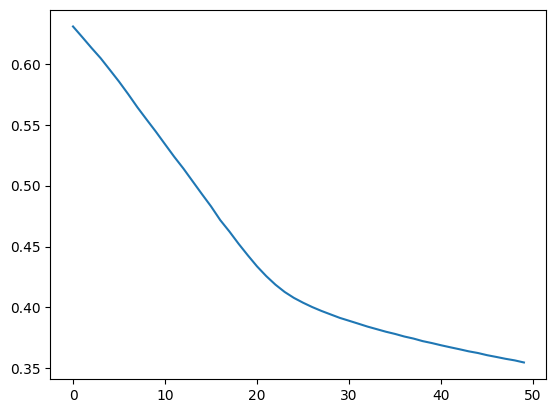

In [ ]:
#criação de gráfico para analisar a acurácia e a perda pelo treinamento
#gráfico da perda
plt.plot(historico.history['loss'])
#linha x = épocas, linha y = perda
#se com as épocas o erro continuar caindo, seria ideal continuar treinando seu algoritmo, sem limite de épocas: 500, 600...

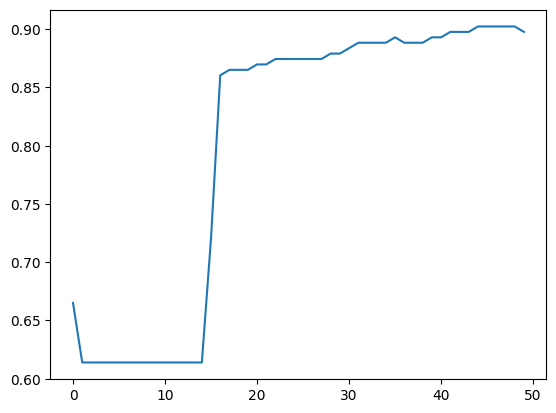

In [ ]:
#gráfico da acurácia
plt.plot(historico.history['accuracy'])
#tendencia de subir de acordo com as épocas, essa rede neural não teria problemas em receber ais treinos

In [ ]:
#tamanho da variavel de teste
X_teste.shape
#podemos ver que temos 6 colunas, cada uma com 54 parâmetros

(54, 6)

In [ ]:
#fazendo as previsões usando a lista de teste
previsoes = rede2(X_teste)
previsoes

<tf.Tensor: shape=(54, 1), dtype=float32, numpy=
array([[1.        ],
       [0.1558999 ],
       [0.99999994],
       [0.6811917 ],
       [1.        ],
       [0.1558999 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.1559325 ],
       [0.1558999 ],
       [1.        ],
       [0.6693553 ],
       [0.1559325 ],
       [0.1558999 ],
       [0.1558999 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.1558999 ],
       [0.1558999 ],
       [1.        ],
       [1.        ],
       [0.1559325 ],
       [0.37514284],
       [1.        ],
       [0.1558999 ],
       [0.1558999 ],
       [0.1558999 ],
       [0.1558999 ],
       [0.1558999 ],
       [0.26236948],
       [0.1558999 ],
       [0.1558999 ],
       [1.        ],
       [1.        ],
       [0.6821374 ],
       [0.9999997 ],
       [0.1558999 ],
       [0.58707494],
       [1.        ],
       [1.        ],
       [1.        ],
      

In [ ]:
previsoes = previsoes >0.5
previsoes
#false é uma imagem do homer e True é uma imagem do bart

<tf.Tensor: shape=(54, 1), dtype=bool, numpy=
array([[ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False]])>

In [ ]:
#comparando as resposta da rede com as respostas corretas
Y_teste

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
#extraindo a acurácia da rede com base nas previsões
from sklearn.metrics import accuracy_score
accuracy_score(Y_teste, previsoes) #essa função calcula a acurácia recebendo 1) dados corretos, 2) previsoes da rede
#de acordo com a precisão da outra rede neural, essa base de dados é melhor calculada com a segunda abordagem de extração de caracteristicas

0.9259259259259259

In [ ]:
#criando matriz de confusão para relacionar as previsões e a resposta
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_teste, previsoes)
cm

array([[24,  2],
       [ 2, 26]])

<Axes: >

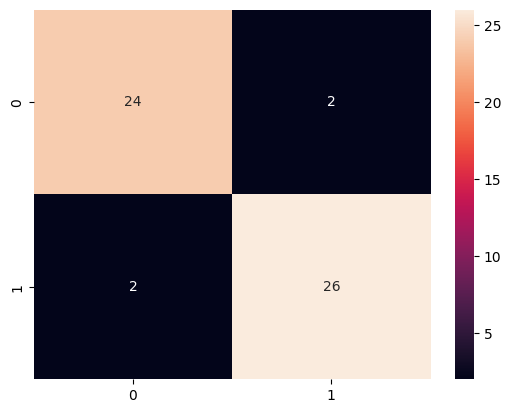

In [ ]:
#criando um mapa de calor para melhor analise da matriz de confusão
sns.heatmap(cm, annot=True)
#vemos que: na primeira linha o numero da esquerda são quantas imagens conseguimos identificar corretamente como homer, a da direita foram classificadas erroneamente como sendo bart
#na segunda linha acontece o mesmo, porem a da esquerda indica as imagens do bart identificadas como homer, e a da direitra os acertos


In [ ]:
#vendo o classification report
from sklearn.metrics import classification_report
print(classification_report(Y_teste, previsoes))
#precision: precisão
#recal: frequencia relativa de identificação correta de uma categoria de imagens, seria a certeza do algoritmo

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.93      0.93      0.93        28

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



##Salvar, carregar e classificar uma única imagem

In [ ]:
#salvando o modelo da rede em json
modelo_json = rede2.to_json() #escrevendo o treinamento em modelo json
with open('rede2.json', 'w') as json_file: #criando o arquivo json
  json_file.write(modelo_json)

In [ ]:
#salvando os pesos da rede
from keras.models import save_model
rede2_salva = save_model(rede2, '/content/pesos2.hdf5')

In [ ]:
#recuperando a estrutura da rede
with open('rede2.json', 'r') as json_file:
  json_modelo_salvo = json_file.read()
json_modelo_salvo

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 6], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 6], "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [ ]:
rede2_carregada = tf.keras.models.model_from_json(json_modelo_salvo) #definindo estrutura
rede2_carregada.load_weights('pesos2.hdf5') #carregando os pesos
rede2_carregada.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
rede2_carregada.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:
imagem_teste = X_teste[0] #pegando a imagem de teste, apenas as caracteristicas
imagem_teste

array([3.07645000e-03, 0.00000000e+00, 0.00000000e+00, 6.49515459e+00,
       5.59913859e+00, 5.59913859e+00])

In [ ]:
imagem_teste=imagem_teste.reshape(1,-1) #a rede neural soo aceita em forma de matriz, então transformamos ela em uma matriz de 1 dimensão

In [ ]:
rede2_carregada.predict(imagem_teste)[0][0]

1/1 [==============================] - 0s 220ms/step


1.0

In [ ]:
if rede2_carregada.predict(imagem_teste)[0][0] < 0.5:
  print('homer')
else:
  print('bart')

1/1 [==============================] - 0s 30ms/step
bart
